# Commands to get results

```bash
cd hh_combination_fw
source setup.sh

mkdir run_heft
cd run_heft
cp ../configs/correlation_schemes/Legacy2022/nonres_v2.json correlation.json
cp ../configs/task_options/Legacy2022/nonres_heft_v1.yaml option_heft.yaml
fullwspath="/eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces"

HHComb process_channels -i ${fullwspath}/original/LegacyRun2/20240320 -c bbbb,bbtautau,bbyy -n nonres --file_expr '<mX[F]>_chhh' -o output --config option_heft.yaml --unblind --tasks modification,likelihood
HHComb combine_channels -i output -s correlation.json -c bbbb,bbtautau,bbyy -n nonres --file_expr '<mX[F]>_chhh' --config option_heft.yaml --unblind --tasks combination,likelihood
```

# Plotting

In [47]:
import os
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

resonant_type = 'heft'
status = 'int'

channel_label_map = {
    'bbbb': r"$\mathit{b\bar{b}b\bar{b}}$",
    'bbtautau': r"$\mathit{b\bar{b}\tau^+\tau^-}$",
    'bbyy': r"$\mathit{b\bar{b}\gamma\gamma}$",
    'combined': r"Combined",
}
channel_text = {
    'combined': r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^- + b\bar{b}\gamma\gamma + b\bar{b}b\bar{b}}$',
    # 'combined': 'HH combination',
    'bbbb': r'$\mathit{HH\rightarrow b\bar{b}b\bar{b}}$',
    'bbyy': r'$\mathit{HH\rightarrow b\bar{b}\gamma\gamma}$',
    'bbtautau': r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^-}$',
}
name_map = {'chhh': r"$c_{hhh}$",
            'ctthh': r"$c_{tthh}$",
            'cgghh': r"$c_{gghh}$"}
default_analysis_label_options = {'loc': (0.03, 0.95),
                                  'fontsize':30, 'energy': '13 TeV', 
                                  'lumi': '126—140 fb$^{-1}$',
                                  'status': status, 'dy': 0.02, 'dy_main': 0.01}
styles_map = {
    'bbyy': {"color": "#9A0EEA", "marker": ","},
    'bbbb': {"color": 'b', "marker": ","},
    'bbtautau': {"color": "#DAA520", "marker": ","},
    'combined': {"color": "r", "marker": ","},
}
config_map = {
    'exp': {
        'contourf_styles': {
            'colors': ["#4AD9D9", "#FDC536"],
            'alpha': 1
        },
        'fill_contour': True,
        'legend_label': 'Expected {sigma_label}',
        'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
    },
    'obs': {
        'bestfit_styles': {
            'marker': 'P',
            'linewidth': 0,
            'markersize': 15,
            'color': 'k'
        },
        'contour_styles': {
            'colors': ["k", "k"],
            'linestyles': ['solid', 'dashed'],
            'linewidths': 3
        },
        'legend_label': 'Observed {sigma_label}',
        'bestfit_label': 'Best fit',
    }
}

def set_plotdir(output_dir):
    plotdir = os.path.join(output_dir, 'figures')
    if not os.path.exists(plotdir):
        os.makedirs(plotdir)
    return plotdir


cgghh obs bbtautau 68%: [0.1414 0.4434] 95%: [-0.5126  0.5812]
cgghh obs bbbb 68%: [-0.4339 -0.26  ] 95%: [-0.5979  0.6148]
cgghh obs bbyy 68%: [-0.2021  0.2913] 95%: [-0.4216  0.516 ]
cgghh obs combined 68%: [0.1532 0.3862] 95%: [-0.3786  0.4944]


<Figure size 432x288 with 0 Axes>

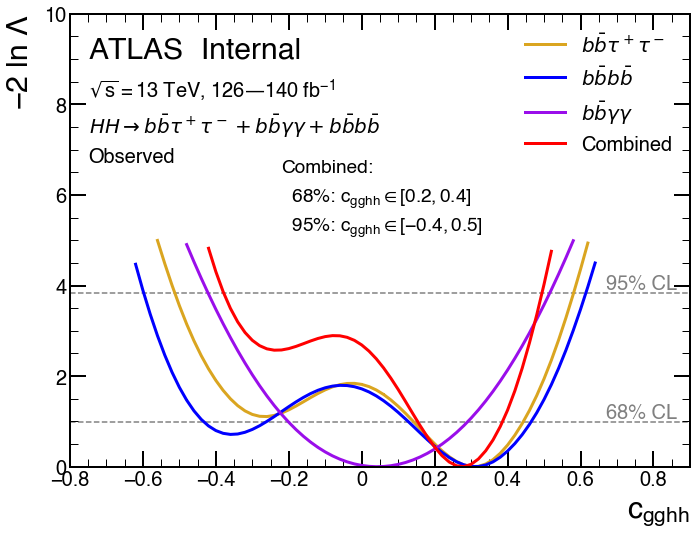

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood/likelihood_cgghh_obs.pdf
cgghh exp bbtautau 68%: [-0.2671  0.2844] 95%: [-0.4181  0.4359]
cgghh exp bbbb 68%: [-0.3445  0.2832] 95%: [-0.4879  0.4523]
cgghh exp bbyy 68%: [-0.3609  0.4642] 95%: [-0.5867  0.6935]
cgghh exp combined 68%: [-0.2336  0.2363] 95%: [-0.3528  0.3659]


<Figure size 432x288 with 0 Axes>

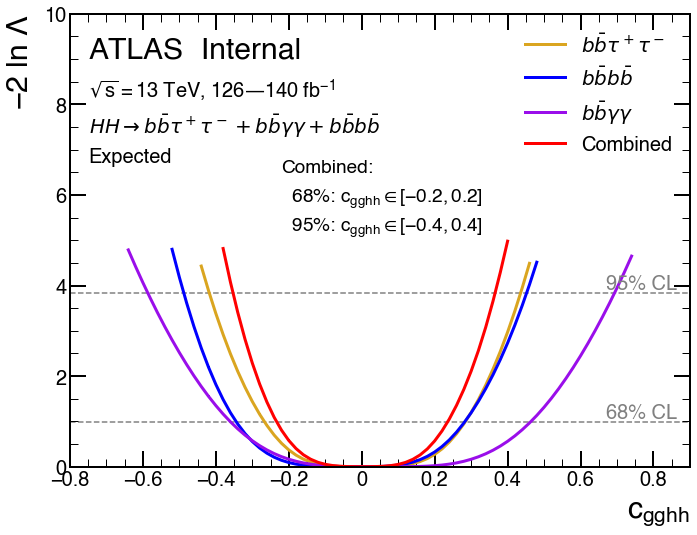

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood/likelihood_cgghh_exp.pdf
ctthh obs bbtautau 68%: [-0.2042 -0.0877] 95%: [-0.4023  0.8422]
ctthh obs bbbb 68%: [-0.0135  0.6082] 95%: [-0.3248  0.8053]
ctthh obs bbyy 68%: [-0.049   0.5003] 95%: [-0.2786  0.7324]
ctthh obs combined 68%: [0.2777 0.5794] 95%: [-0.1857  0.6986]


<Figure size 432x288 with 0 Axes>

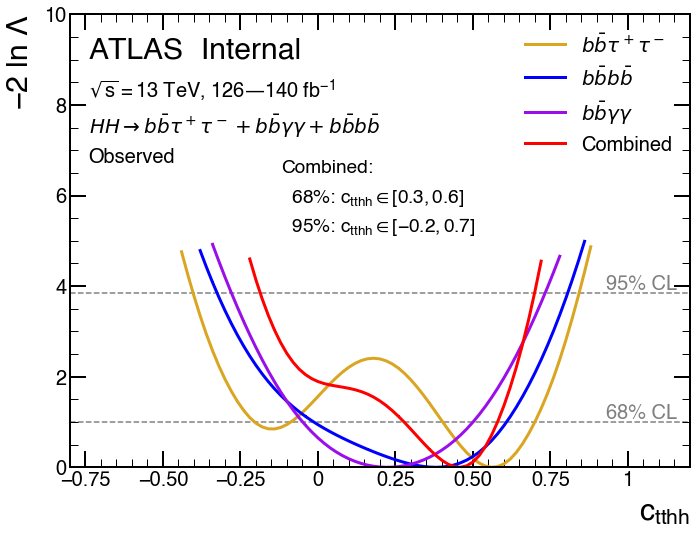

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood/likelihood_ctthh_obs.pdf
ctthh exp bbtautau 68%: [-0.167  0.568] 95%: [-0.3144  0.7168]
ctthh exp bbbb 68%: [-0.2909  0.6083] 95%: [-0.4803  0.8234]
ctthh exp bbyy 68%: [-0.2582  0.7162] 95%: [-0.4771  0.9367]
ctthh exp combined 68%: [-0.1425  0.5316] 95%: [-0.2663  0.6645]


<Figure size 432x288 with 0 Axes>

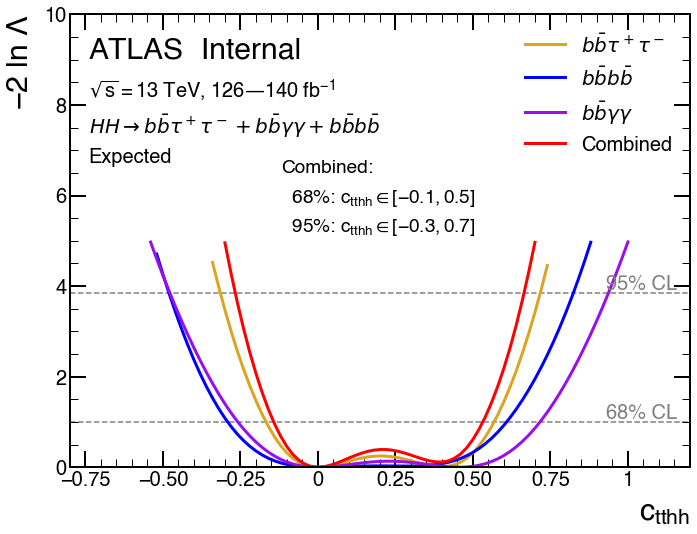

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood/likelihood_ctthh_exp.pdf


In [50]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output"
combine_tag = 'bbbb_bbtautau_bbyy-fullcorr'
plotdir = set_plotdir(output_dir)

from quickstats.maths.interpolation import get_intervals
from quickstats.plots import Likelihood1DPlot
ylabel = r"$-2\ ln\ \Lambda$"
xrange = {'cgghh': (-0.8, 0.9), 'ctthh': (-0.8, 1.2)}
styles = { 'legend': {'loc': 'upper right'},
           'xlabel': {'fontsize': 30},
           'ylabel': {'fontsize': 30},
           'plot': {'linewidth': 3}}
anno_op = {'x': 0.34, 'y': 0.65, 'dy': 0.065, 'font_size': 19}
channels = ['bbtautau', 'bbbb', 'bbyy']

for v in ['cgghh','ctthh']:
    for o in ['obs','exp']:
        default_analysis_label_options['extra_text'] = channel_text['combined'] + '//' + ('Observed' if o == 'obs' else 'Expected')
        data = {}
        for c in channels + ['combined']:
            likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
            if not os.path.exists(likelihood_path):
                print(likelihood_path, 'not exist')
                continue
            data[c] = json.load(open(likelihood_path))
        likelihood_df = {}
        uncond_df = {}
        likelihood_df_orig = {}
        for c in data:
            df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
            uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
            df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
            likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
            likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>5].index)
        plotter = Likelihood1DPlot(likelihood_df, label_map=channel_label_map, styles_map=styles_map, styles=styles,
                                   analysis_label_options=default_analysis_label_options, config={'errorband_legend': True})
        ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
        dic = {}
        for c in channels + ['combined']:
            dic[c] = {}
            if c not in likelihood_df: continue
            intersections_1 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=1, delta=0.0001)[0]
            intersections_2 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=3.84, delta=0.0001)[0]
            dic[c]['68% low'], dic[c]['68% high'] = intersections_1
            dic[c]['95% low'], dic[c]['95% high'] = intersections_2
            if c == 'combined':
                ax.annotate(r'Combined:', 
                            (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                ax.annotate(r'  $68\%$: '+name_map[v]+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
                            (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                ax.annotate(r'  $95\%$: '+name_map[v]+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
                            (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
            print(v, o, c, '68%:', intersections_1, '95%:', intersections_2)
        os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
        filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}_{o}.pdf")
        plt.savefig(filename, bbox_inches="tight")
        plt.show()
        print('Save to', filename)
        dic = json.dumps(dic, indent=4, separators=(',', ': '))
        with open(filename.replace('.pdf','.json'), 'w') as json_file:
            json_file.write(dic)


/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/likelihood/heft/bbtautau/chhh_obs/likelihoods_chhh.json not exist
/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/likelihood/heft/bbyy/chhh_obs/likelihoods_chhh.json not exist
/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/likelihood/heft/combined/bbbb_bbtautau_bbyy-fullcorr/chhh_obs/likelihoods_chhh.json not exist
chhh obs bbbb 68%: [ 1.7596 11.013 ] 95%: [-4.4809 13.4001]


<Figure size 432x288 with 0 Axes>

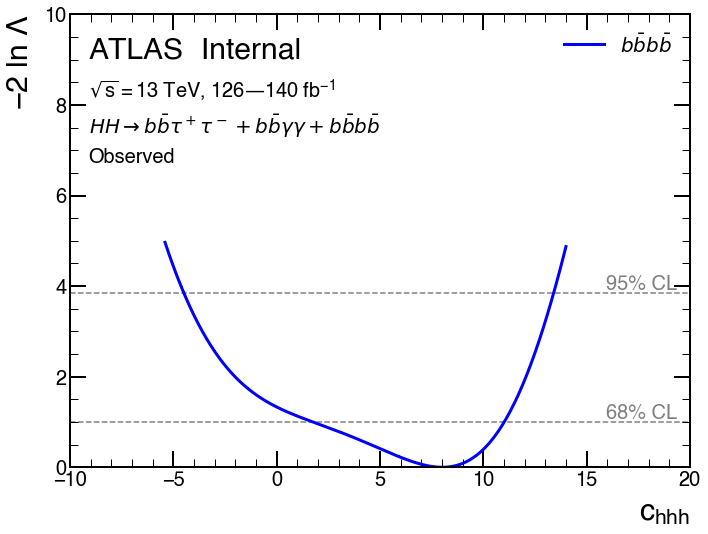

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood/likelihood_chhh_obs.pdf
/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/likelihood/heft/bbtautau/chhh_exp/likelihoods_chhh.json not exist
/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/likelihood/heft/bbyy/chhh_exp/likelihoods_chhh.json not exist
/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/likelihood/heft/combined/bbbb_bbtautau_bbyy-fullcorr/chhh_exp/likelihoods_chhh.json not exist
chhh exp bbbb 68%: [-3.2682 10.1149] 95%: [-5.9495 12.8596]


<Figure size 432x288 with 0 Axes>

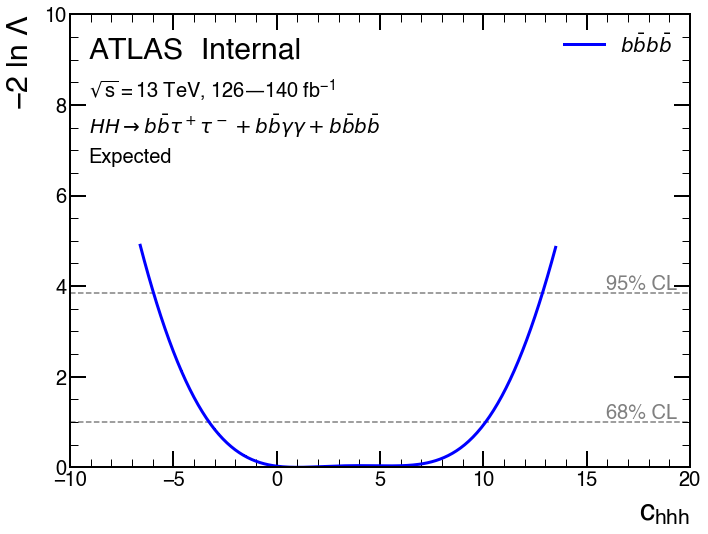

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood/likelihood_chhh_exp.pdf


In [51]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output"
combine_tag = 'bbbb_bbtautau_bbyy-fullcorr'
plotdir = set_plotdir(output_dir)

from quickstats.maths.interpolation import get_intervals
from quickstats.plots import Likelihood1DPlot
ylabel = r"$-2\ ln\ \Lambda$"
xrange = {'chhh': (-10, 20)}
styles = { 'legend': {'loc': 'upper right'},
           'xlabel': {'fontsize': 30},
           'ylabel': {'fontsize': 30},
           'plot': {'linewidth': 3}}
anno_op = {'x': 0.34, 'y': 0.65, 'dy': 0.065, 'font_size': 19}
channels = ['bbtautau', 'bbbb', 'bbyy']

for v in ['chhh']:
    for o in ['obs','exp']:
        default_analysis_label_options['extra_text'] = channel_text['combined'] + '//' + ('Observed' if o == 'obs' else 'Expected')
        data = {}
        for c in channels + ['combined']:
            likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
            if not os.path.exists(likelihood_path):
                print(likelihood_path, 'not exist')
                continue
            data[c] = json.load(open(likelihood_path))
        likelihood_df = {}
        uncond_df = {}
        likelihood_df_orig = {}
        for c in data:
            df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
            uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
            df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
            likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
            likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>5].index)
        plotter = Likelihood1DPlot(likelihood_df, label_map=channel_label_map, styles_map=styles_map, styles=styles,
                                   analysis_label_options=default_analysis_label_options, config={'errorband_legend': True})
        ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
        dic = {}
        for c in channels + ['combined']:
            dic[c] = {}
            if c not in likelihood_df: continue
            intersections_1 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=1, delta=0.0001)[0]
            intersections_2 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=3.84, delta=0.0001)[0]
            dic[c]['68% low'], dic[c]['68% high'] = intersections_1
            dic[c]['95% low'], dic[c]['95% high'] = intersections_2
            if c == 'combined':
                ax.annotate(r'Combined:', 
                            (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                ax.annotate(r'  $68\%$: '+name_map[v]+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
                            (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                ax.annotate(r'  $95\%$: '+name_map[v]+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
                            (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
            print(v, o, c, '68%:', intersections_1, '95%:', intersections_2)
        os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
        filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}_{o}.pdf")
        plt.savefig(filename, bbox_inches="tight")
        plt.show()
        print('Save to', filename)
        dic = json.dumps(dic, indent=4, separators=(',', ': '))
        with open(filename.replace('.pdf','.json'), 'w') as json_file:
            json_file.write(dic)


Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_chhh_cgghh_bbyy.pdf


<Figure size 432x288 with 0 Axes>

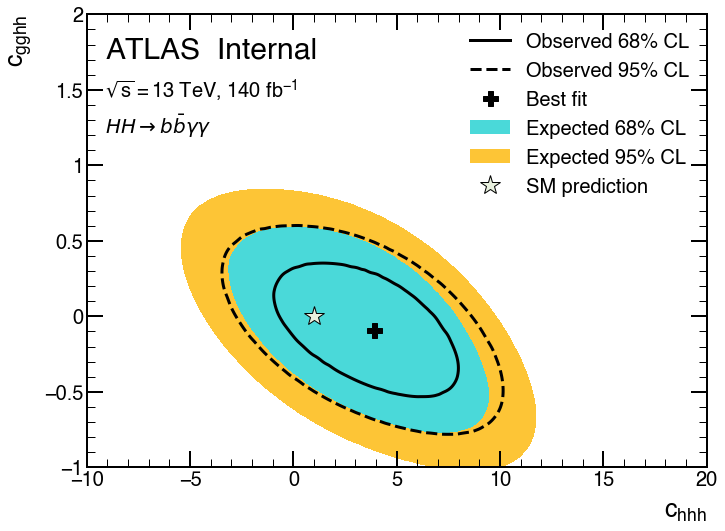

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_chhh_cgghh_bbtautau.pdf


<Figure size 432x288 with 0 Axes>

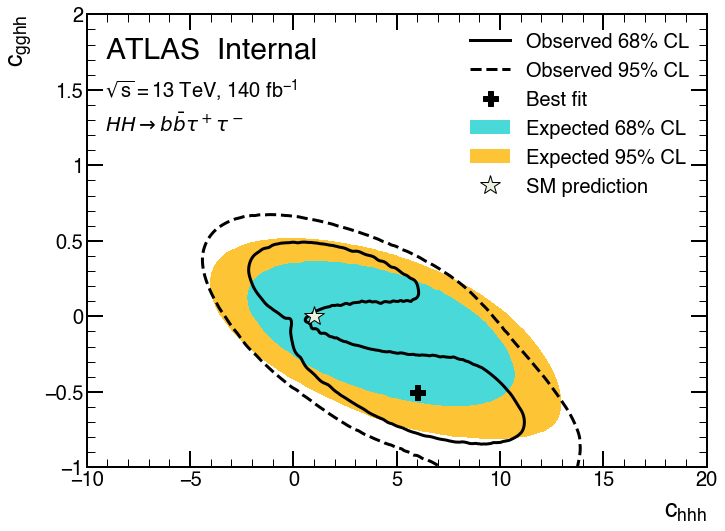

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_chhh_cgghh_bbbb.pdf


<Figure size 432x288 with 0 Axes>

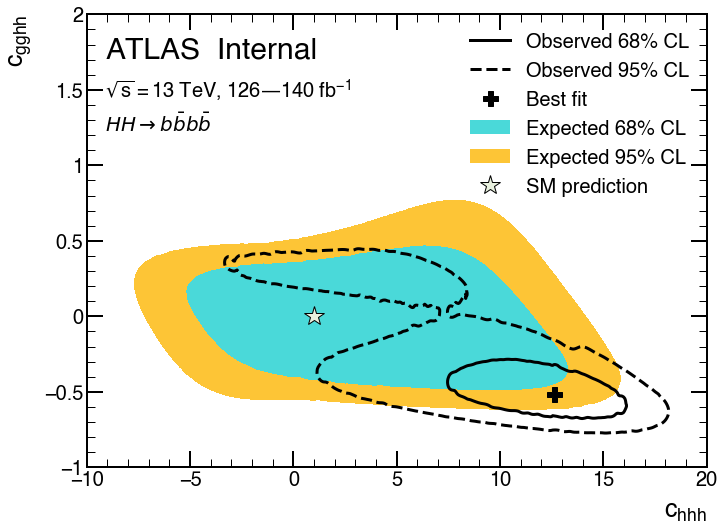

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_chhh_cgghh_combined.pdf


<Figure size 432x288 with 0 Axes>

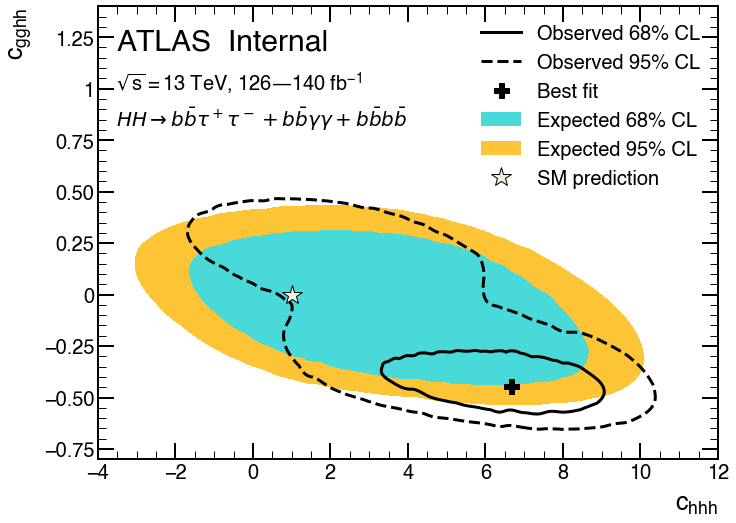

In [46]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output"
combine_tag = 'bbbb_bbtautau_bbyy-fullcorr'
params = ('chhh', 'cgghh')
plotdir = set_plotdir(output_dir)

from quickstats.plots import Likelihood2DPlot
channels = ['bbyy', 'bbtautau', 'bbbb'] + ['combined']
styles = {'xlabel': {'fontsize': 25},
          'ylabel': {'fontsize': 25}}

for c in channels:
    if c=='combined': rangec = {'xmin': -4, 'xmax': 12, 'ymin': -0.8, 'ymax': 1.4}
    else: rangec = {'xmin': -10, 'xmax': 20, 'ymin': -1, 'ymax': 2}
    analysis_label_options = default_analysis_label_options
    analysis_label_options['extra_text'] = channel_text[c]
    if c in ['bbyy','bbtautau']: analysis_label_options['lumi'] = '140 fb$^{-1}$'
    else: analysis_label_options['lumi'] = '126—140 fb$^{-1}$'
    dfs = {}
    data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['obs'] = pd.DataFrame(data_obs)
    data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['exp'] = pd.DataFrame(data_exp)
    plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
                               analysis_label_options=analysis_label_options)
    plotter.add_highlight(1, 0, label="SM prediction")
    ax = plotter.draw(xattrib=params[0], yattrib=params[1],
                      targets=['obs','exp'],
                      xlabel=name_map[params[0]],
                      ylabel=name_map[params[1]],
                      draw_bestfit=['obs'],
                      interval_format='68_95',**rangec)
    os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_{c}.pdf")
    print('Save to', filename)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()


Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_chhh_ctthh_bbyy.pdf


<Figure size 432x288 with 0 Axes>

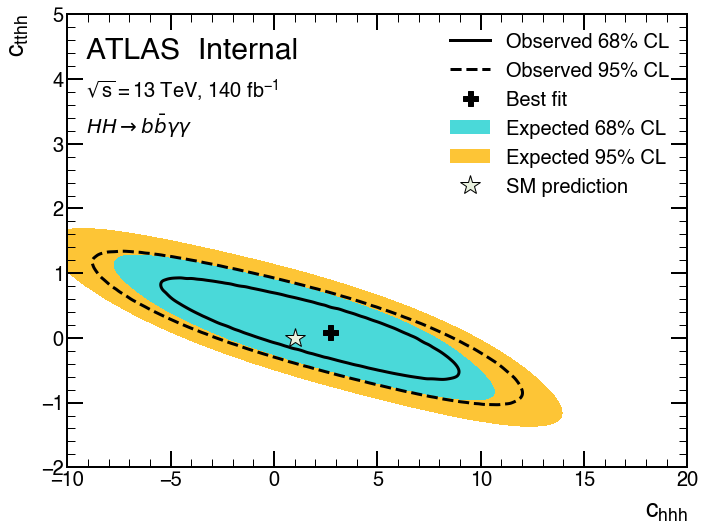

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_chhh_ctthh_bbtautau.pdf


<Figure size 432x288 with 0 Axes>

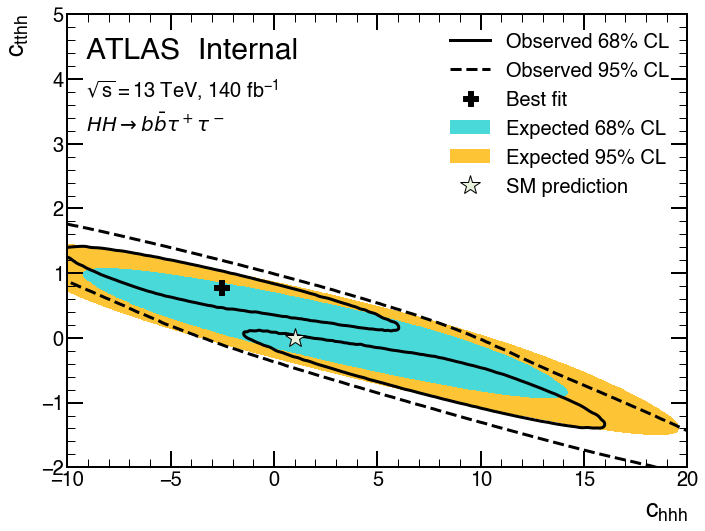

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_chhh_ctthh_bbbb.pdf


<Figure size 432x288 with 0 Axes>

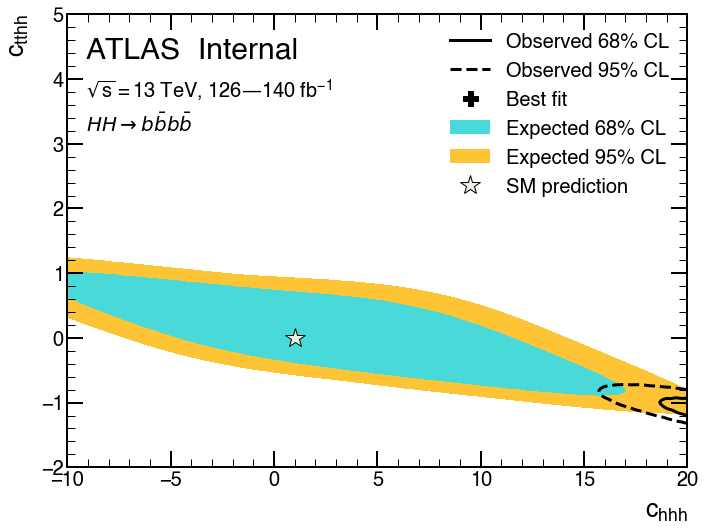

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_chhh_ctthh_combined.pdf


<Figure size 432x288 with 0 Axes>

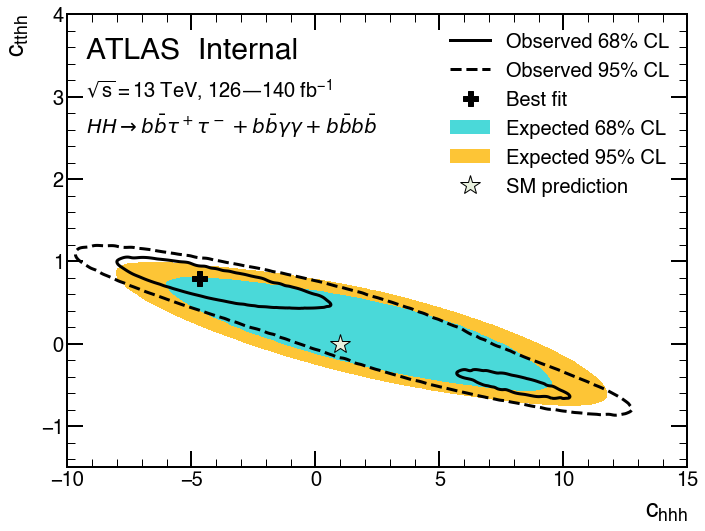

In [41]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output"
combine_tag = 'bbbb_bbtautau_bbyy-fullcorr'
params = ('chhh', 'ctthh')
plotdir = set_plotdir(output_dir)

from quickstats.plots import Likelihood2DPlot
channels = ['bbyy', 'bbtautau', 'bbbb'] + ['combined']
styles = {'xlabel': {'fontsize': 25},
          'ylabel': {'fontsize': 25}}

for c in channels:
    if c=='combined': rangec = {'xmin': -10, 'xmax': 15, 'ymin': -1.5, 'ymax': 4}
    else: rangec = {'xmin': -10, 'xmax': 20, 'ymin': -2, 'ymax': 5}
    analysis_label_options = default_analysis_label_options
    analysis_label_options['extra_text'] = channel_text[c]
    if c in ['bbyy','bbtautau']: analysis_label_options['lumi'] = '140 fb$^{-1}$'
    else: analysis_label_options['lumi'] = '126—140 fb$^{-1}$'
    dfs = {}
    data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['obs'] = pd.DataFrame(data_obs)
    data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['exp'] = pd.DataFrame(data_exp)
    plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
                               analysis_label_options=analysis_label_options)
    plotter.add_highlight(1, 0, label="SM prediction")
    ax = plotter.draw(xattrib=params[0], yattrib=params[1],
                      targets=['obs','exp'],
                      xlabel=name_map[params[0]],
                      ylabel=name_map[params[1]],
                      draw_bestfit=['obs'],
                      interval_format='68_95',**rangec)
    os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_{c}.pdf")
    print('Save to', filename)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()


Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_cgghh_ctthh_bbyy.pdf


<Figure size 432x288 with 0 Axes>

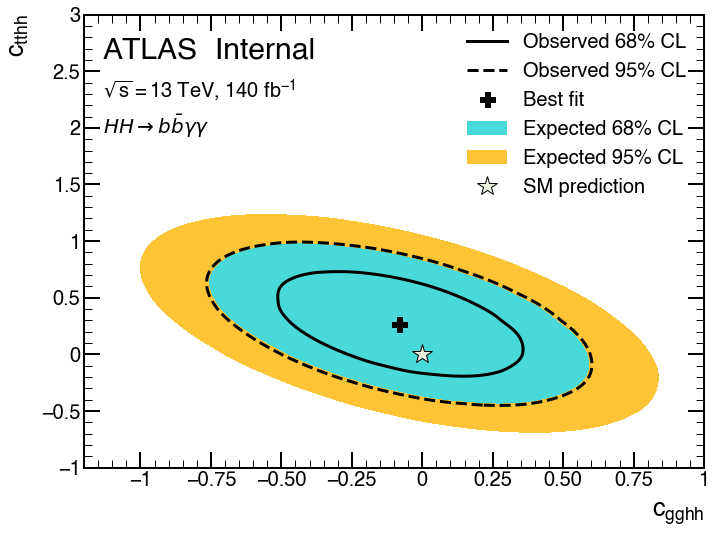

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_cgghh_ctthh_bbtautau.pdf


<Figure size 432x288 with 0 Axes>

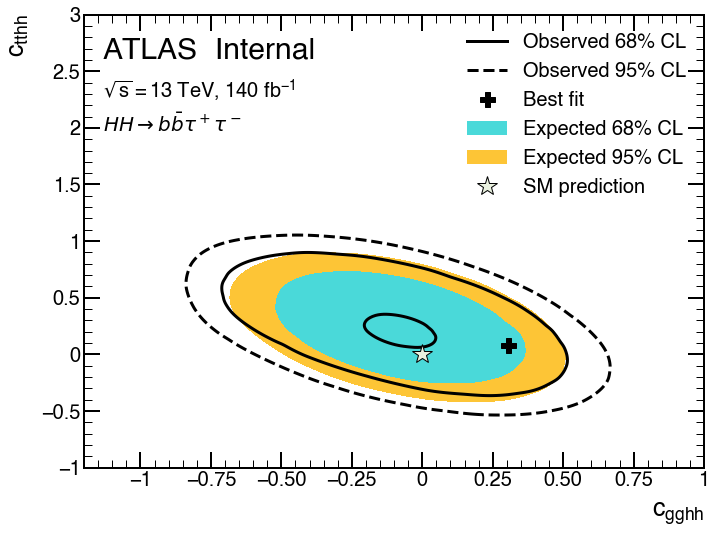

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_cgghh_ctthh_bbbb.pdf


<Figure size 432x288 with 0 Axes>

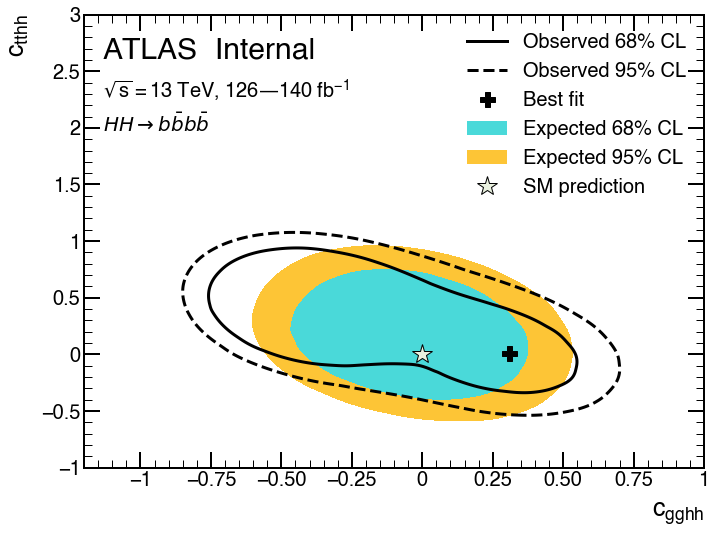

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output/figures/int/likelihood_2d/likelihood_cgghh_ctthh_combined.pdf


<Figure size 432x288 with 0 Axes>

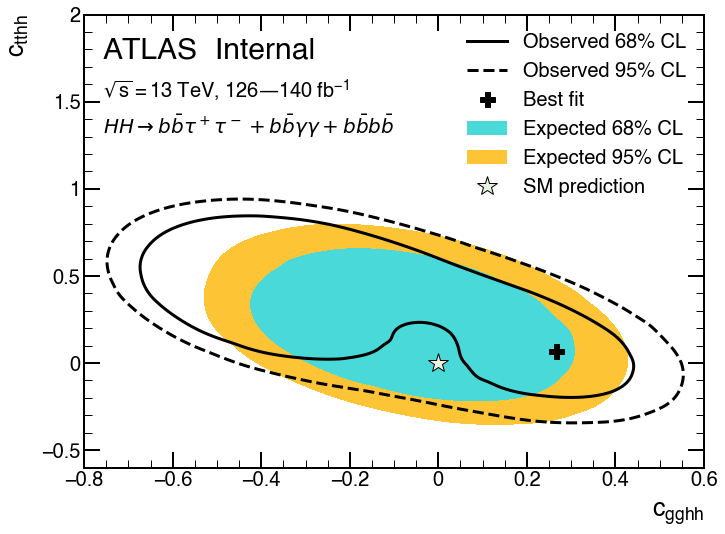

In [43]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_heft/output"
combine_tag = 'bbbb_bbtautau_bbyy-fullcorr'
params = ('cgghh', 'ctthh')
plotdir = set_plotdir(output_dir)

from quickstats.plots import Likelihood2DPlot
channels = ['bbyy', 'bbtautau', 'bbbb'] + ['combined']
styles = {'xlabel': {'fontsize': 25},
          'ylabel': {'fontsize': 25}}

for c in channels:
    if c=='combined': rangec = {'xmin': -0.8, 'xmax': 0.6, 'ymin': -0.6, 'ymax': 2}
    else: rangec = {'xmin': -1.2, 'xmax': 1, 'ymin': -1, 'ymax': 3}
    analysis_label_options = default_analysis_label_options
    analysis_label_options['extra_text'] = channel_text[c]
    if c in ['bbyy','bbtautau']: analysis_label_options['lumi'] = '140 fb$^{-1}$'
    else: analysis_label_options['lumi'] = '126—140 fb$^{-1}$'
    dfs = {}
    data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['obs'] = pd.DataFrame(data_obs)
    data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['exp'] = pd.DataFrame(data_exp)
    plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
                               analysis_label_options=analysis_label_options)
    plotter.add_highlight(0, 0, label="SM prediction")
    ax = plotter.draw(xattrib=params[0], yattrib=params[1],
                      targets=['obs','exp'],
                      xlabel=name_map[params[0]],
                      ylabel=name_map[params[1]],
                      draw_bestfit=['obs'],
                      interval_format='68_95',**rangec)
    os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_{c}.pdf")
    print('Save to', filename)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
